In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading the data
df = pd.read_csv("haberman.csv")
df.describe()

,Age,op_year,axil_nodes_det,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
#Number of data points
df.shape

(305, 4)

In [10]:
#number of features
print(df.columns)

Index(['Age', 'op_year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [16]:
#number of classes
df['Surv_status'].unique()

array([1, 2])

In [17]:
#Number of datapoints for each class

df['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

In [ ]:
#Our objective is to identify the whether the patient survived in a 5 years 
#span or not after getting operated for Breast cancer.

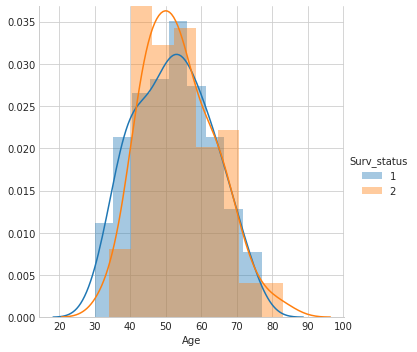

In [7]:
#PDF for each feature(Age, op_year, axil_nodes_det)
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

#The graph actually quite complex and it is really hard to conclude 
#that what are results in output 1 or 2 ( being survived or not)
#but for not survived(2)graph follows a bell curve or normal distribution.
#One thing I infer from this is that density for patient survived is more where Age is between 30 to 40.
#And when Age is > 75 it's quite visible in the graph that the patient didn't survived.

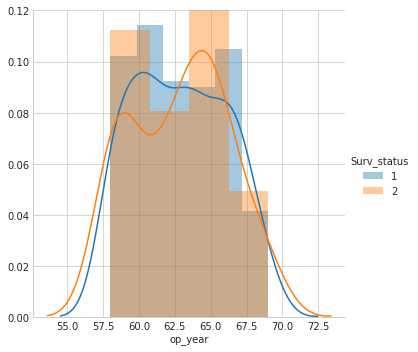

In [8]:
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.show();

#The graph shows that the feature op_year doesn't really provide any good evidence to predict the results.
#Neither of the graph follows normal distribution.

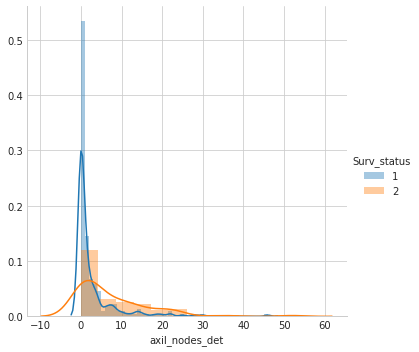

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.show();

#This is rather a better graph that may just seperates the results whether the patient is survived or not.
#The graph really depicts that the probability of a patient survived is much higher when axil_nodes_det >-2 and <=8.
#The height of the graph for blue line(1) says that axil_nodes_det has most of the values at 2 for the patients being survived.
#Also the density for the patient survived is more where axil_nodes_det is between 0 and 4.


[ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


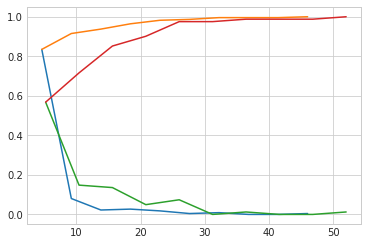

In [14]:
#plot CDF of axil_nodes_det
df_survived = df.loc[df["Surv_status"] == 1];
df_not_survived = df.loc[df["Surv_status"] == 2];

#Survived
counts, bin_edges = np.histogram(df_survived['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Not Survived
counts, bin_edges = np.histogram(df_not_survived['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

#There are 92% people who survived when axil_nodes_det < 15.
#For the same case patients not survived was approx 85% as we have seen in the above graph.
#Although it does not make much sense because CDF for Survived patients is kind of results.
#We will see try and analyse both Age and axil_nodes_det feature together in Bi-variate analyses.

[ 0.04910714  0.10714286  0.125       0.09375     0.16517857  0.16517857
  0.09375     0.11160714  0.0625      0.02678571]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]
[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


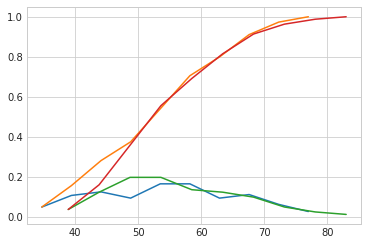

In [15]:
#plot CDF of Age
#Survived
counts, bin_edges = np.histogram(df_survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Not Survived
counts, bin_edges = np.histogram(df_not_survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

#It's really hard to predict the results with Age feature as seen in the below graph. 
#What's infered is that there is approx to 100% chance that patients did not survived when Age > 74 and < 80
#We can better quantify results in Bi-variate analyses

In [24]:
#Before plotting the Box plots and Voilin plots, we start with computing mean, median and mode.
print("Means :")
print("Mean for axil nodes for survived  is :",  np.mean(df_survived['axil_nodes_det']))
print("Mean for axil nodes for not survived  is :", np.mean(df_not_survived['axil_nodes_det']))      

print("Mean for Age for survived  is :", np.mean(df_survived['Age']))
print("Mean for Age for not survived  is :", np.mean(df_not_survived['Age']))      

print("Standard Deviation :")
print("Standard deviation for axil nodes for survived  is :", np.std(df_survived['axil_nodes_det']))
print("Standard deviation for axil nodes for not survived  is :", np.std(df_not_survived['axil_nodes_det']))

print("Standard deviation for Age for survived  is :", np.std(df_survived['Age']))
print("Standard deviation for Age for not survived  is :", np.std(df_not_survived['Age']))

#From the below values. The mean of survived and not survived for Age is almost similar.
#But the mean for axil_nodes_det says something, that patients that survived have average 
#value of axil_nodes_det approx 3 in comparison to those who not survived having average values approx 7.5
#Also the spread of axil nodes for survived is slightly lower than those who did not survived.

Means :
Mean for axil nodes for survived  is : 2.799107142857143
Mean for axil nodes for not survived  is : 7.45679012345679
Mean for Age for survived  is : 52.11607142857143
Mean for Age for not survived  is : 53.67901234567901
Standard Deviation :
Standard deviation for axil nodes for survived  is : 5.869092706952767
Standard deviation for axil nodes for not survived  is : 9.128776076761632
Standard deviation for Age for survived  is : 10.913004640364269
Standard deviation for Age for not survived  is : 10.10418219303131


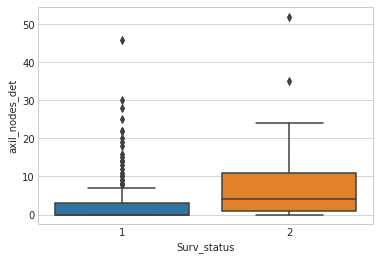

In [25]:
#Box plot for axil nodes det

sns.boxplot(x = 'Surv_status', y = 'axil_nodes_det', data = df)
plt.show()

#We can say that when ax >= 2 and ax < 11, then patient is not survived.
#But by making the above assumption we also concluded that there are roughly 50 percentile patients that are wrongly
#classified as not survived i.e 50% error. 

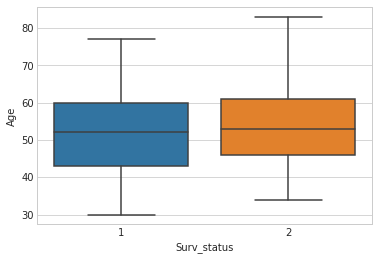

In [26]:
#Box plot for Age

sns.boxplot(x = 'Surv_status', y = 'Age', data = df)
plt.show()

#It's hard to make any assumptions by looking at the below graph because it will lead to too much errorneous.
#The only assumptions I can make is that for patients who survived most of them aged >=30 and < 75 
#While those who did not survived have aged >=35 and <85.

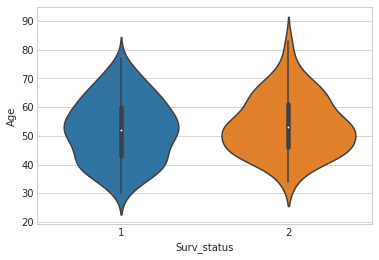

In [29]:
#Violin plots for axil_nodes_det
sns.violinplot(x = 'Surv_status', y = 'Age', data = df, size = 5)
plt.show()

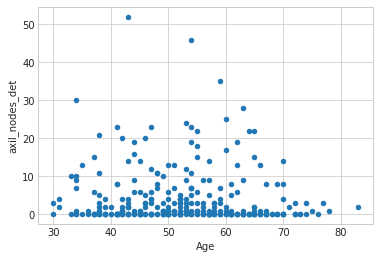

In [30]:
df.plot(kind= 'scatter', x = 'Age', y = 'axil_nodes_det')
plt.show()

#The scatter plot between features Age and axil nodes tells that Age varies typically between 30 to 85
#Whereas the axil nodes vary from 0 to 52 approx.

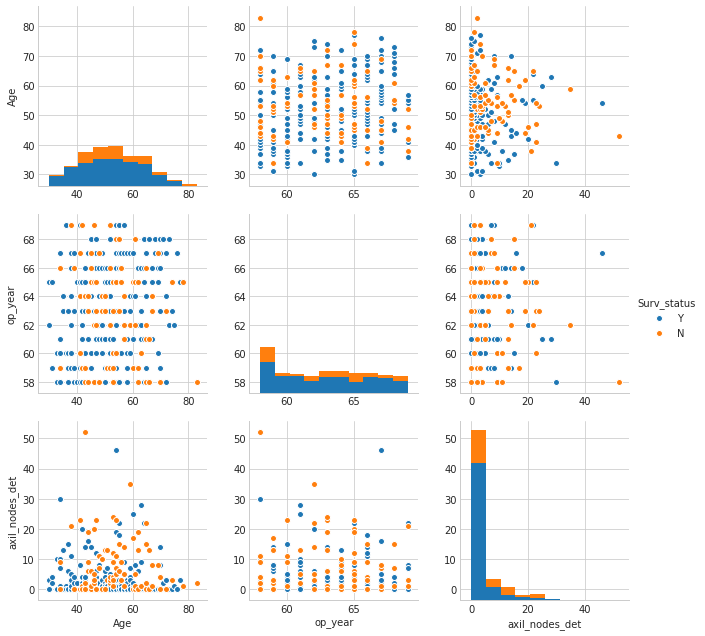

In [7]:
# pairwise scatter plot: Pair-Plot
df['Surv_status'] = df['Surv_status'].map(lambda x : 'Y' if x == 1 else 'N')# Y being survived

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Surv_status", size=3);
plt.show()

In [ ]:
#The overall conclusion on which I came to is that op_year feature does not support in anyway to 
#predict the objective which is to classify whether the patient has survived or not as the histogram looked
#overlapping and quite hard to infer anything from that.
#Moreover Age feature shows almost same tendency except the fact that at extreme data points it is easy to determine
#whether the patient survived or not.
#Axil nodes is the best among all three features as it helps further to classify based on probability whether the
#patient survived or not.